# Exercício 03
## Correlação e Visualização
### Alunos:

- João Marco Oliveira Barros - 10351992
- Leandro Giusti Mugnaini - 10260351
-Matheus Borges Kamla - 10277015

---

Nesse exercício iremos trabalhar com uma versão simplificada do conjunto *player_attributes.csv* que utilizamos na última aula com os seguinte atributos:

- Dribbling - Nota para o drible do jogador
- Ball Control - Nota para o controle da bola do jogador
- Strength - Estimativa da força do jogador
- Classe - Estrela ou Normal. Um jogador é considerado uma estrela se sua nota geral é maior ou igual à 78. **Você deve ignorar a coluna overall_rating uma vez que este cálculo já foi feito**


### Questão 01.

Leia os dados (`pandas.read_csv`) do arquivo `player_attributes.csv` e separe a coluna **Classe** dos outros atributos.



In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
players = pd.read_csv("/content/drive/My Drive/Colab Notebooks/player_attributes.csv")
players

,Unnamed: 0,dribbling,ball_control,strength,overall_rating,Classe
0,0,58.0,64.0,61.0,62.0,Normal
1,1,51.0,60.0,71.0,61.0,Normal
2,2,74.0,73.0,63.0,72.0,Normal
3,3,33.0,44.0,75.0,62.0,Normal
4,4,70.0,71.0,70.0,73.0,Normal
...,...,...,...,...,...,...
345,345,66.0,72.0,79.0,69.0,Normal
346,346,70.0,72.0,42.0,70.0,Normal
347,347,13.0,26.0,91.0,63.0,Normal
348,348,70.0,70.0,66.0,70.0,Normal


In [3]:
classes = players["Classe"]
dados = players.drop(columns = ["Unnamed: 0", "Classe"])
dados

,dribbling,ball_control,strength,overall_rating
0,58.0,64.0,61.0,62.0
1,51.0,60.0,71.0,61.0
2,74.0,73.0,63.0,72.0
3,33.0,44.0,75.0,62.0
4,70.0,71.0,70.0,73.0
...,...,...,...,...
345,66.0,72.0,79.0,69.0
346,70.0,72.0,42.0,70.0
347,13.0,26.0,91.0,63.0
348,70.0,70.0,66.0,70.0


### Questão 02.

Calcule a matriz de covariância dos dados (`numpy.cov`) e visualize-a através de um heatmap (`seaborn.heatmap`). Ative a exibição dos valores de cada célula do heatmap.

In [4]:
cov_matrix = dados.cov()
cov_matrix

,dribbling,ball_control,strength,overall_rating
dribbling,316.641801,246.804241,-33.552043,34.336177
ball_control,246.804241,228.925616,-8.414212,36.604928
strength,-33.552043,-8.414212,125.017348,11.920892
overall_rating,34.336177,36.604928,11.920892,34.933287


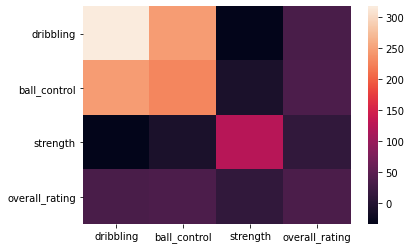

In [5]:
heatmap_cov = sb.heatmap(cov_matrix)
heatmap_cov



---

### Questão 03.

Agora calcule a matriz de correlação (`pandas.DataFrame.corr`) utilizando o método de Pearson, gerando um heatmap da matriz. Esse método apresenta alguma vantagem com o método da questão anterior?

In [6]:
cor_pearson = dados.corr(method='pearson')
cor_pearson

,dribbling,ball_control,strength,overall_rating
dribbling,1.000000,0.916687,-0.168636,0.326474
ball_control,0.916687,1.000000,-0.049737,0.409329
strength,-0.168636,-0.049737,1.000000,0.180386
overall_rating,0.326474,0.409329,0.180386,1.000000


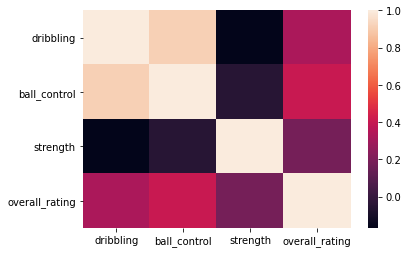

In [7]:
heatmap_cor_pearson = sb.heatmap(cor_pearson)
heatmap_cor_pearson

blablabla



---

### Questão 04.

Agora calcule as matrizes de correlação utilizando os métodos de Kendall e Spearman. Exiba seus heatmaps.

In [8]:
cor_kendall = dados.corr(method='kendall')
cor_kendall

,dribbling,ball_control,strength,overall_rating
dribbling,1.000000,0.731547,-0.128539,0.346307
ball_control,0.731547,1.000000,-0.044941,0.481651
strength,-0.128539,-0.044941,1.000000,0.145968
overall_rating,0.346307,0.481651,0.145968,1.000000


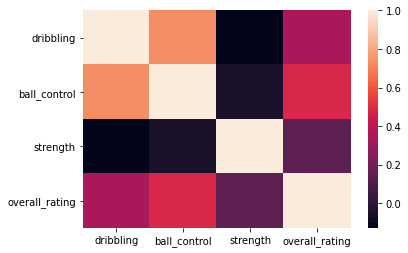

In [9]:
heatmap_cor_kendall = sb.heatmap(cor_kendall)
heatmap_cor_kendall

In [10]:
cor_spearman = dados.corr(method='spearman')
cor_spearman

,dribbling,ball_control,strength,overall_rating
dribbling,1.000000,0.882894,-0.188715,0.456750
ball_control,0.882894,1.000000,-0.065211,0.608309
strength,-0.188715,-0.065211,1.000000,0.203608
overall_rating,0.456750,0.608309,0.203608,1.000000


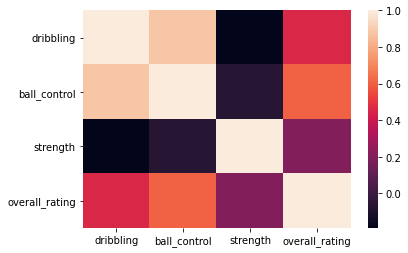

In [11]:
heatmap_cor_spearman = sb.heatmap(cor_spearman)
heatmap_cor_spearman



---

### Questão 05.

Determine os pares de variáveis que apresentam maior e menor correlação de spearman. Depois produza scatter plots (`matplotlib.pyplot.scatter`) desses pares de variáveis. Comente como os dados estão distribuídos nos gráficos.

In [15]:
import matplotlib as plt

max_id = cor_spearman.idxmax() #correlação máxima 
min_id = cor_spearman.idxmin() #correlação mínima

print("Valores máximos de correlação: \n", max_id)

print("\n Valores mínimos de correlação: \n", min_id)

Valores máximos de correlação: 
 dribbling              dribbling
ball_control        ball_control
strength                strength
overall_rating    overall_rating
dtype: object

 Valores mínimos de correlação: 
 dribbling          strength
ball_control       strength
strength          dribbling
overall_rating     strength
dtype: object


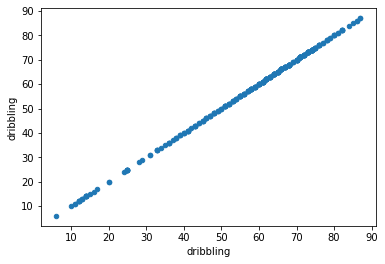

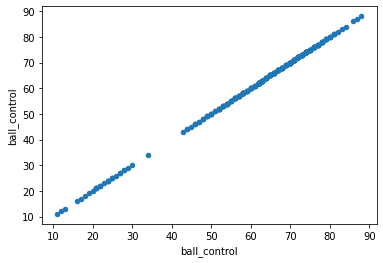

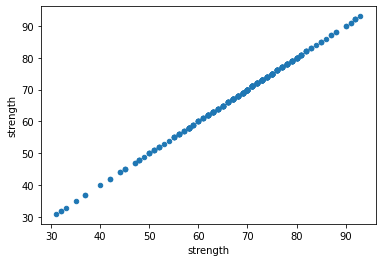

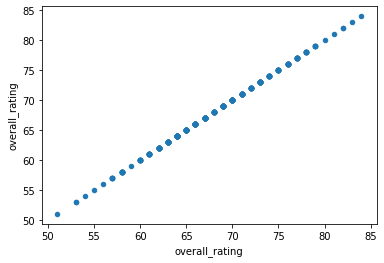

In [16]:
for m in max_id:
  dados.plot.scatter(x=m, y=m)

É possível observar que a máxima correlação são dos atributos com eles mesmos, gerando um gráfico linear crescente, o que faz sentido já que a correlação do atributo consigo mesmo é máxima

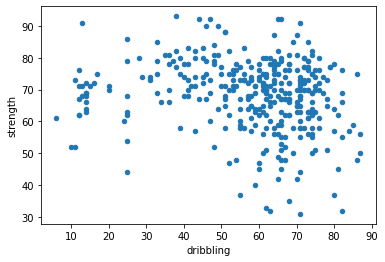

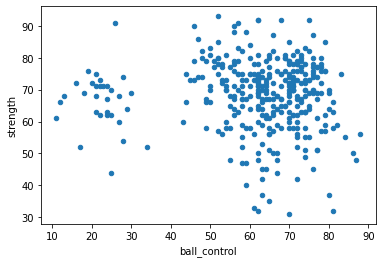

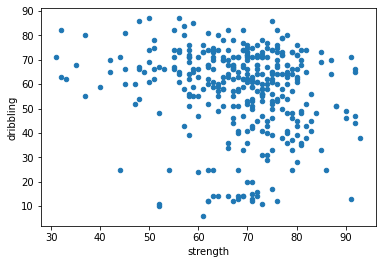

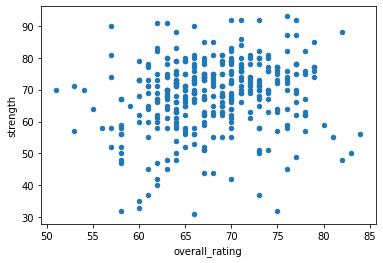

In [17]:
atrib_a = ['dribbling','ball_control','strength','overall_rating']
atrib_b = ['strength','strength','dribbling','strength']

for i in range(len(atrib_a)):
  dados.plot.scatter(x=atrib_a[i], y=atrib_b[i])

Como os atributos possuem baixa correlação (correlação próxima de 0), siginifica que eles não apresentam nenhuma relação de proporcionalidade, são idependentes entre si, dessa forma é possível observar o gráfico totalmente disperso, sem nenhum padrão.



---

### Questão 06.

Produza um diagrama de torta (`matplotlib.pyplot.pie`) mostrando a distribuição dos jogadores que são estrelas ou não.

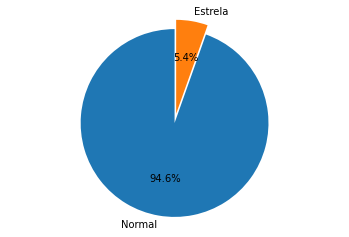

In [18]:
import matplotlib.pyplot as plt
len(classes[classes == "Normal" ])
len(classes[classes == "Estrela" ])

labels = 'Normal', 'Estrela'
sizes = [len(classes[classes == "Normal" ]), len(classes[classes == "Estrela" ])]
explode = (0, 0.1)  # só faz com que o Estrela

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)

ax1.axis('equal')  # Faz com que a porcentagem total seja limitada a 100% e permaneça o circulo

plt.show()